## Name: Arpit Saxena

## Entry Number: 2018MT10742

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv("2018MT10742.csv")["x"]
confidence = 0.05

## Question 1

In [3]:
print(f'Data mean = {data.mean()}')

Data mean = 0.05542199485096252


In [4]:
mean_test = 0.055
n = len(data)
t_stat = (data.mean() - mean_test) / (data.std() / np.sqrt(n))
crit_t = stats.t.ppf(1 - confidence/2, len(data) - 1)
print(f't-statistic from data = {t_stat}, critical t value = {crit_t}')

t-statistic from data = 0.5307691833236253, critical t value = 1.9604386466615242


## Question 2

In [5]:
print(f'Data variance = {data.var()}')

Data variance = 0.003160624548083802


In [6]:
var_test = 0.003
n = len(data)
chi_stat = (n - 1) * data.var() / var_test
lower_interval = stats.chi2.ppf(confidence / 2, len(data) - 1)
upper_interval = stats.chi2.ppf(1 - confidence / 2, len(data) - 1)
print(f'Non-rejection interval: [{lower_interval}, {upper_interval}], statistic: {chi_stat}')


Non-rejection interval: [4804.924332159057, 5196.864170605186], statistic: 5266.654038623643


## Question 3

In [7]:
from scipy.stats import expon

_, l_inv = expon.fit(data)
lmbda = 1 / l_inv
print(f"Lambda = {lmbda}")

Lambda = 18.0503363179046


In [8]:
data.sort_values().to_numpy()

array([2.13650573e-05, 2.23091805e-05, 2.51095173e-05, ...,
       4.46536831e-01, 5.06904574e-01, 5.45918198e-01])

In [9]:
# Making groups so nP >= 5
sorted_vals = data.sort_values().to_numpy()
begin = 0
prev_begin = 0
end = sorted_vals[0]
num_elems = 1
i = 1
test_stat = 0
num_vals = len(sorted_vals)
k = 0

while i < num_vals:
    prob = expon.cdf(end, scale=1/lmbda) - expon.cdf(begin, scale=1/lmbda)
    if prob * num_elems >= 5:
        observed_freq = num_elems
        theoretical_freq = prob * num_vals
        print(f"[{begin}, {end}]: obs {observed_freq}, exp {theoretical_freq}")
        test_stat += (observed_freq - theoretical_freq) ** 2 / theoretical_freq
        k += 1
        prev_begin = begin
        begin = end
        end = sorted_vals[i]
        num_elems = 1
    else:
        end = sorted_vals[i]
        num_elems += 1
    
    i += 1

# Some elements at the end remain and they need to be merged.
test_stat -= (observed_freq - theoretical_freq) ** 2 / theoretical_freq # reset test stat
observed_freq += num_elems
theoretical_freq = (1 - expon.cdf(prev_begin, scale=1/lmbda)) * num_vals
print(f"-MERGED- [{prev_begin}, infty]: obs {observed_freq}, exp {theoretical_freq}")
test_stat += (observed_freq - theoretical_freq) ** 2 / theoretical_freq # reset 


[0, 0.0017439629694336]: obs 162, exp 154.9440449311792
[0.0017439629694336, 0.0035901173493425]: obs 159, exp 158.79471841318335
[0.0035901173493425, 0.0055230804977731]: obs 156, exp 160.68709182503312
[0.0055230804977731, 0.0074497451747043]: obs 165, exp 154.68039963442266
[0.0074497451747043, 0.0095957056678184]: obs 153, exp 166.0707530587882
[0.0095957056678184, 0.0115294054202321]: obs 175, exp 144.23305791606722
[0.0115294054202321, 0.013790033524856]: obs 155, exp 162.3577297215366
[0.013790033524856, 0.0160745185696416]: obs 159, exp 157.47726662320548
[0.0160745185696416, 0.0183992279538264]: obs 163, exp 153.72099993394616
[0.0183992279538264, 0.0209817649900085]: obs 155, exp 163.3744736166079
[0.0209817649900085, 0.0237293217796832]: obs 152, exp 165.65241552076643
[0.0237293217796832, 0.0265271883302679]: obs 158, exp 160.45158142814458
[0.0265271883302679, 0.0294746515444583]: obs 157, exp 160.49118459253415
[0.0294746515444583, 0.0325016818371498]: obs 161, exp 156.17

In [10]:
from scipy.stats import chi2
test_stat
tabled_value = chi2.ppf(1-confidence,k - 1)
print(f"Test stat: {test_stat}, Table val: {tabled_value}")
if test_stat > tabled_value:
    print("REJECT NULL")
else:
    print("CAN'T REJECT NULL")

Test stat: 29.74999162219288, Table val: 43.77297182574219
CAN'T REJECT NULL


## Question 4


In [11]:
import matplotlib.pyplot as plt
from scipy.stats import t
def perform_regression(X, Y):
    xmean = X.mean()
    ymean = Y.mean()
    slope = np.dot(X - xmean, Y - ymean) / np.sum((X - xmean) ** 2)
    intercept = ymean - slope * xmean

    print(f"Slope = {slope}, Intercept = {intercept}")

    # Plot regression results
    fig, ax = plt.subplots()
    ax.plot(X, Y, 'b.', label="Actual Data")

    linex = np.linspace(X.min() - 2, X.max() + 2, 500)
    liney = slope * linex + intercept
    ax.plot(linex, liney, 'r', label="Fitted line")

    ax.legend()

    # Estimating error variance
    rss = np.sum((Y - slope * X - intercept) ** 2)
    variance = rss / (len(X) - 2)
    print(f"Error Variance Estimate = {variance}")

    # Calculating R^2 and adjusted R^2
    tss = np.sum((Y - ymean) ** 2)
    r2 = 1 - rss / tss
    num_params = 2
    adj_r2 = 1 - ((1 - r2) * (len(X) - 1)) / (len(X) - num_params - 1)
    print(f"R^2 = {r2}, Adjusted R^2 = {adj_r2}")

    # Statistical significance of slope
    print("\nTesting for slope:")
    variance_slope = variance / np.sum((X - xmean) ** 2)
    t_stat = slope / np.sqrt(variance_slope)
    crit_stat = t.ppf(1-confidence/2, len(X) - 2)
    print(f"T statistic = {t_stat}, Critical value = {crit_stat}")
    if np.abs(t_stat) > crit_stat:
        print("Statistically signifcant")
    else:
        print("Not significant")

    # Statistical significance of intercept
    print("\nTesting for intercept:")
    variance_intercept = np.sum(X ** 2) / (len(X) * np.sum((X - xmean) ** 2)) * variance
    t_stat = intercept / np.sqrt(variance_intercept)
    crit_stat = t.ppf(1-confidence/2, len(X) - 2)
    print(f"T statistic = {t_stat}, Critical value = {crit_stat}")
    if np.abs(t_stat) > crit_stat:
        print("Statistically signifcant")
    else:
        print("Not significant")

    return fig, ax

In [12]:
death = pd.read_csv("death.csv", usecols=[0, 2], index_col=0)
incd = pd.read_csv("incd.csv", index_col=0)
death.columns = ['death_rate']
combined_data = death.assign(incd_rate=incd)

In [13]:
def is_float(s):
    try: 
        float(s)
        return True
    except ValueError:
        return False

In [14]:
cleaned_data = combined_data[combined_data['death_rate'].apply(is_float) & combined_data['incd_rate'].apply(is_float)]
cleaned_data = cleaned_data.apply(lambda series: series.apply(float))

Slope = -95.90555683611262, Intercept = 35323.81271849963
Error Variance Estimate = 229335846.73241743
R^2 = 0.00783997307129658, Adjusted R^2 = 0.00713380935106267

Testing for slope:
T statistic = -4.71299354991779, Critical value = 1.9608082661638189
Statistically signifcant

Testing for intercept:
T statistic = 31.558695167259373, Critical value = 1.9608082661638189
Statistically signifcant


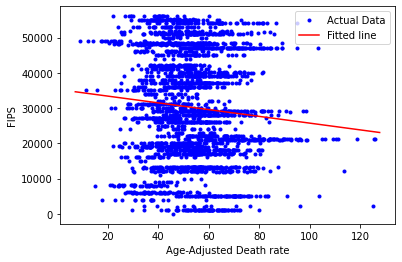

In [15]:
cleaned_death = death[death['death_rate'].apply(is_float)]
cleaned_death = cleaned_death["death_rate"].transform(float)
fig, ax = perform_regression(cleaned_death.to_numpy(), cleaned_death.index.to_numpy())
ax.set_xlabel("Age-Adjusted Death rate")
ax.set_ylabel("FIPS")
pass

Slope = 0.6948087365901285, Intercept = 4.788864452589401
Error Variance Estimate = 49.70772610775537
R^2 = 0.7547929054348136, Adjusted R^2 = 0.7546015616232138

Testing for slope:
T statistic = 88.83956009829721, Critical value = 1.9608896368168331
Statistically signifcant

Testing for intercept:
T statistic = 8.45362565222265, Critical value = 1.9608896368168331
Statistically signifcant


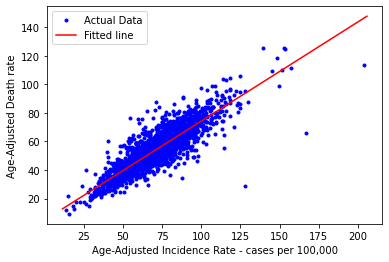

In [16]:
fig, ax = perform_regression(cleaned_data["incd_rate"].to_numpy(), cleaned_data["death_rate"].to_numpy())
ax.set_xlabel("Age-Adjusted Incidence Rate - cases per 100,000")
ax.set_ylabel("Age-Adjusted Death rate")
pass